# Data visualization of Fifa 19 data with seaborn

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
current_directory =os.getcwd() 
current_directory
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/Users/myyntiimac/Desktop/FIFA.csv")
df.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.index

RangeIndex(start=0, stop=18207, step=1)

In [7]:
df.shape

(18207, 89)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [9]:
df["Body Type"].value_counts()# its give the occrence or no of unique value, ex, normaltype body 10595 players

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [10]:
df["Body Type"].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [11]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [12]:
df.isnull().any()

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 89, dtype: bool

Insight: the data set contain 89 atribute where 38 float, 5 integer and 45 object or catagorical.
there is  null value in the data set, its need to treatment

# UNIVARIATE ANALYSIS

In [13]:
##Univariate analysis(by distplot, histplot and kdeplot)
#We can start with distplot, which shows distribution of variable and frequency of variable in y_axis
# and also with connected line

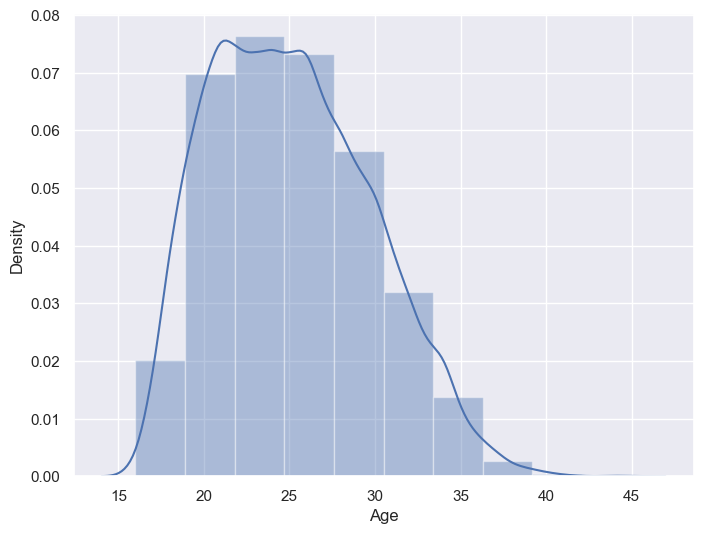

In [14]:
plt.subplots(figsize=(8,6))
a = df['Age']
ax = sns.distplot(a, bins=10)
plt.show()

Insight: it shows age variable distribution is positively skewed, that infer there may be outliar

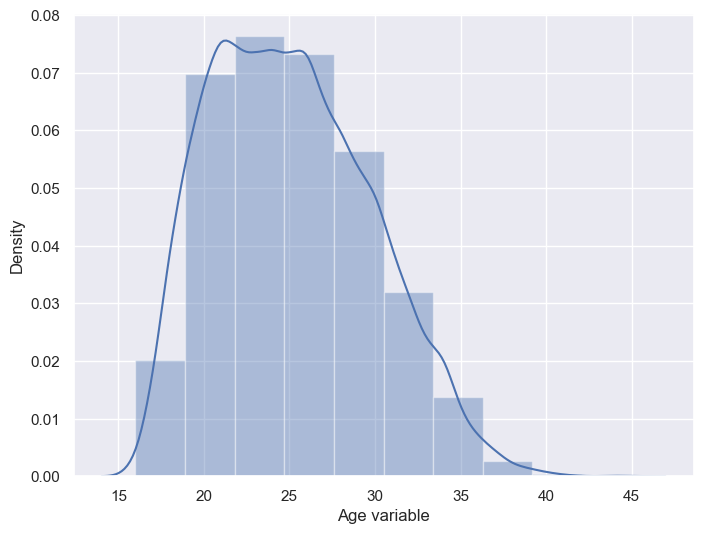

In [15]:
#lets do the sameplot with variable into pd series so that visualize more clear and also with bin size
plt.subplots(figsize=(8,6))
x = df['Age']
x = pd.Series(x, name="Age variable")
sns.distplot(x, bins=10)
plt.show()

Insight:in here we can see x_axies is more specifies with label , bin number also specifies

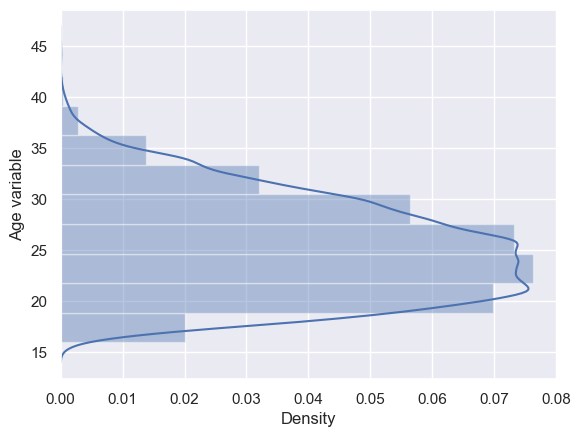

In [16]:
#if we want see the same plot in vertical then mention,vertical = True
x = df['Age']
x = pd.Series(x, name="Age variable")
sns.distplot(x, vertical= True,bins=10)
plt.show()

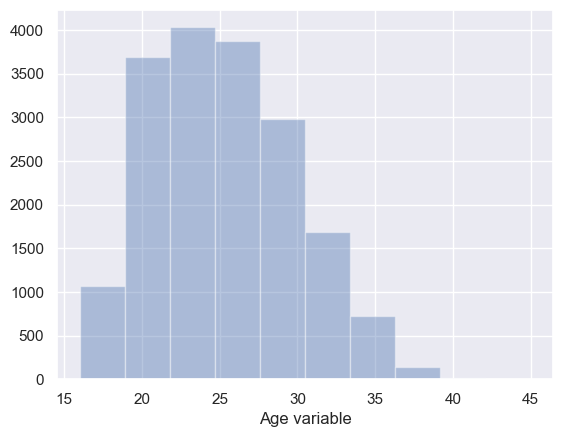

In [17]:
# if you want to see the graph without the line 
sns.distplot(x,kde=False, bins=10)
plt.show()

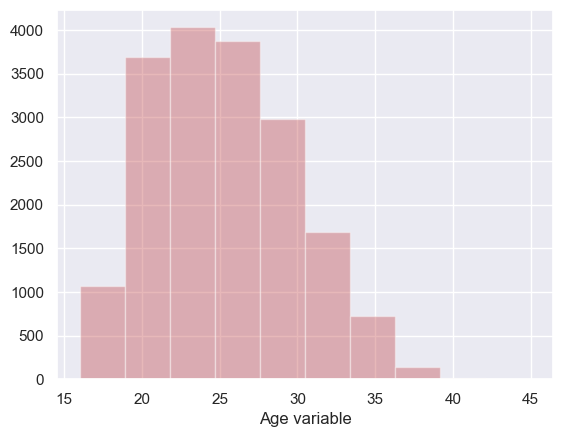

In [18]:
# Changing the color
sns.distplot(x,kde=False,color="r", bins=10)
plt.show()

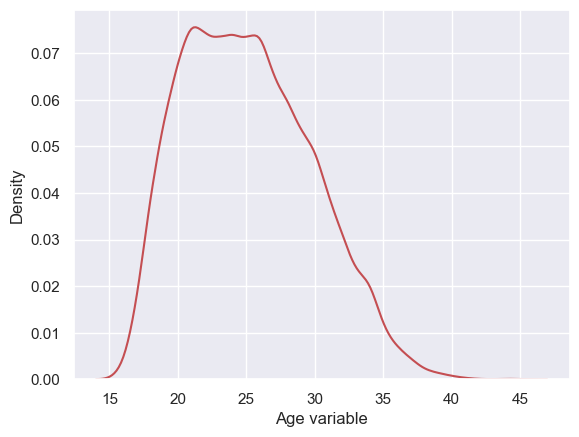

In [32]:
#kdeplot(bettter for to see smooth shape distribution line) and histplot(same  as distplot but without line) or histogram
# with this plot we will see both univariate and bivariate anlysis

sns.kdeplot(x,color="r")
plt.show()

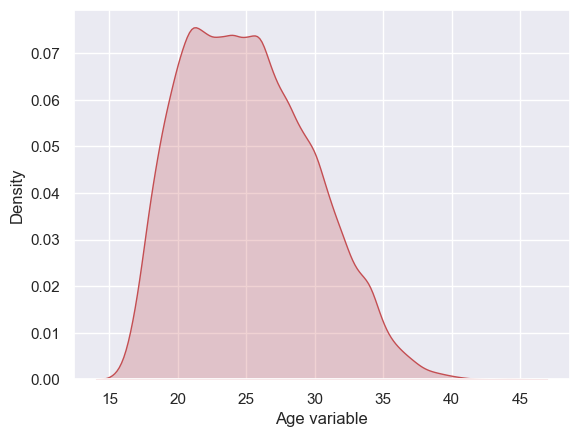

In [33]:
#filling with shade
sns.kdeplot(x, shade= True,color="r")
plt.show()

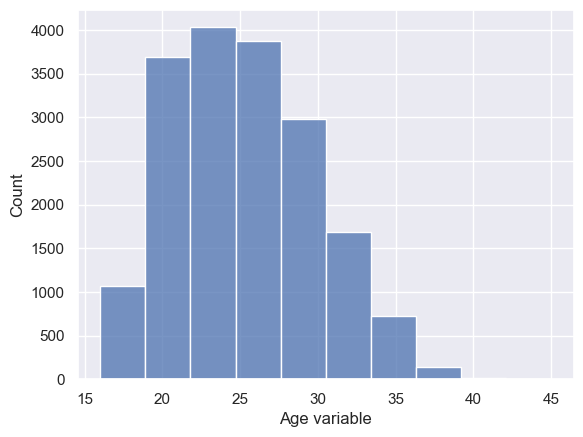

In [35]:
#histogram
sns.histplot(x,bins=10)
plt.show()

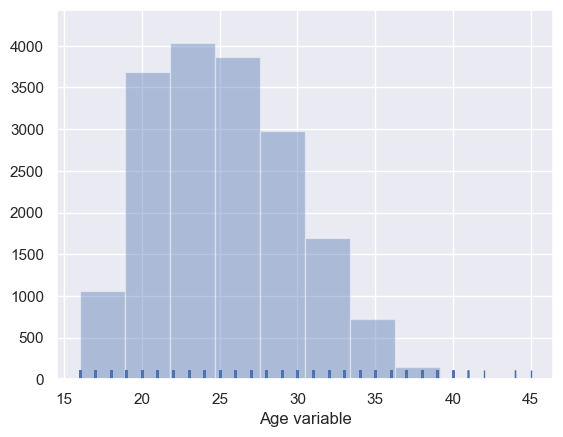

In [41]:
# In seaborn ,other way we can create histplot with the help of distplot and omiting kde
#rug use for xticks in X axies
sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

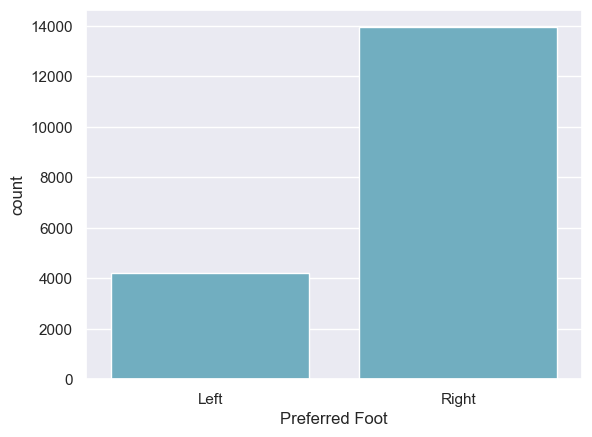

In [95]:
##Countplot,shows the counts of observations in each categorical bin using bars like histo gram 
sns.countplot(x="Preferred Foot", data=df, color="c")
plt.show()

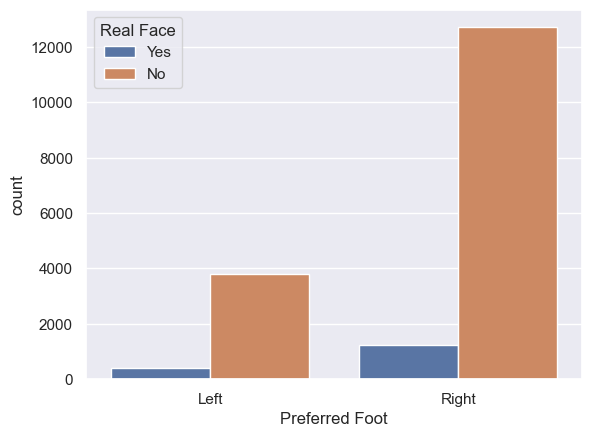

In [97]:
#we can use  hue as second parameter
sns.countplot(x="Preferred Foot", hue="Real Face", data=df)
plt.show()

Inight:Right preferred foot with Real face player more than left preferred foot non real face

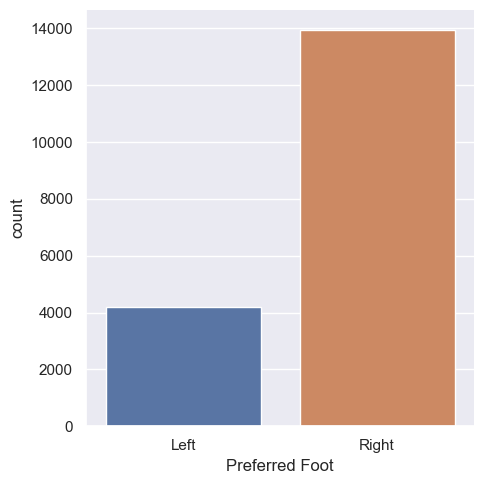

In [8]:
#Catplot or categorical plot,create categorical plots, also known as categorical data visualization
#you can also create  boxplot, barplot,countplot,stripplot by changing kind
# the X-axies variable must catagorical and y axies numerical or catagorical

sns.catplot(x="Preferred Foot", kind="count",data=df)

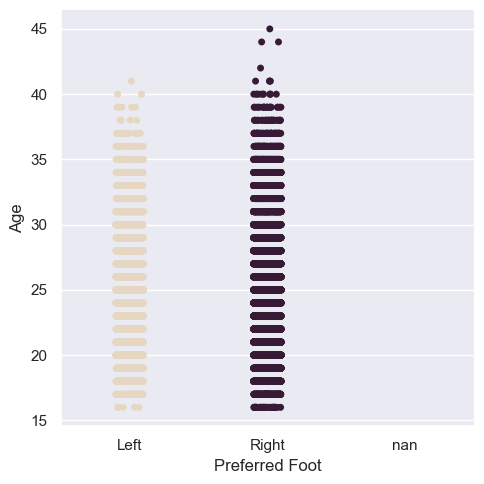

In [5]:
sns.catplot(x="Preferred Foot", y="Age", palette="ch:.24", data=df)

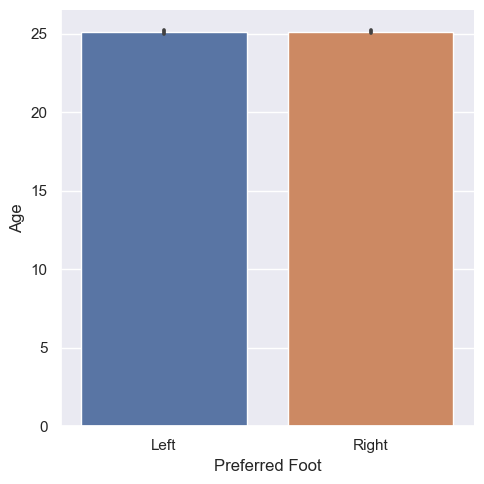

In [12]:
# canging the kind=bar is similer to countplot
#if use bar  you need a continous variable in y axies
sns.catplot(x="Preferred Foot",y="Age", kind="bar",data=df)

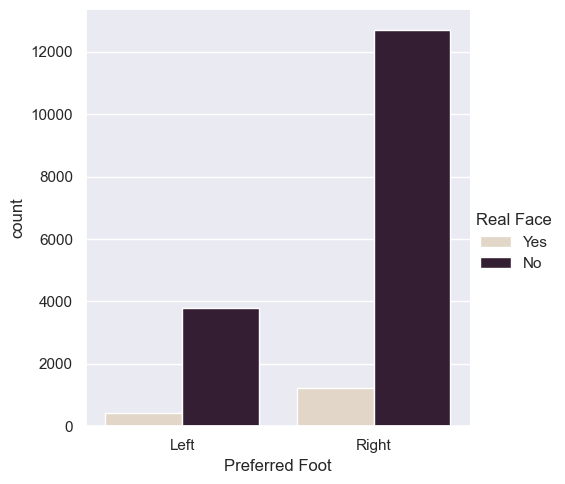

In [10]:
#you can use as hue parameter
sns.catplot(x="Preferred Foot", kind="count",hue="Real Face", palette="ch:.24", data=df)

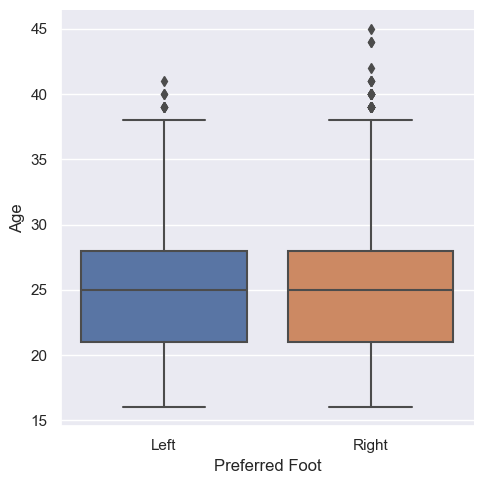

In [13]:
sns.catplot(x="Preferred Foot",y="Age", kind="box",data=df)

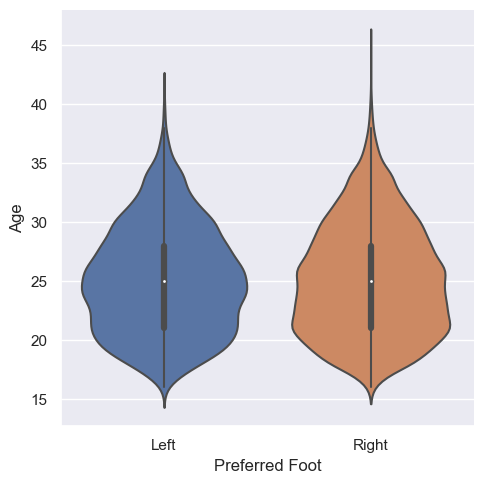

In [14]:
sns.catplot(x="Preferred Foot",y="Age", kind="violin",data=df)

Insight:From univariatte analysis  of preferred foot  explain Both left and right foot player have outliar where outliar for right foot has higher value than left food.and right hand and  no face flower have higest percentage than left hand with face.

In [42]:
y=df["Potential"]
y

0        94
1        94
2        93
3        93
4        92
         ..
18202    65
18203    63
18204    67
18205    66
18206    66
Name: Potential, Length: 18207, dtype: int64

In [52]:
x = df['Age']
x

0        31
1        33
2        26
3        27
4        27
         ..
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

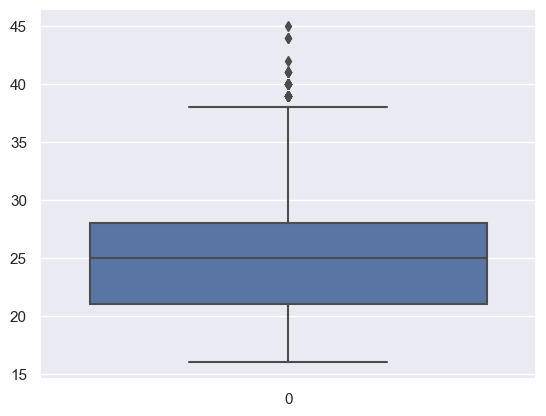

In [55]:
#boxplot
sns.boxplot(x)
plt.show()


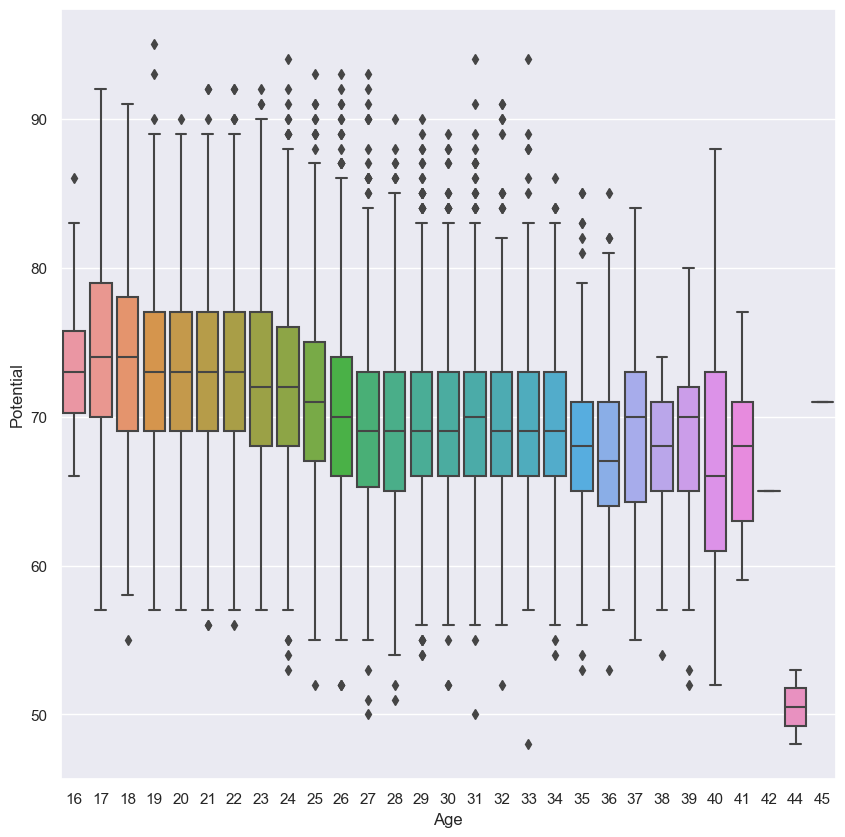

In [63]:
#We can see bivariate with boxplot 
#but it will be god to see if X axies variable is catagory (if fi size big is well to see numerical, like this )
plt.subplots(figsize=(10, 10))
sns.boxplot(x="Age", y="Potential", data=df)
plt.show()

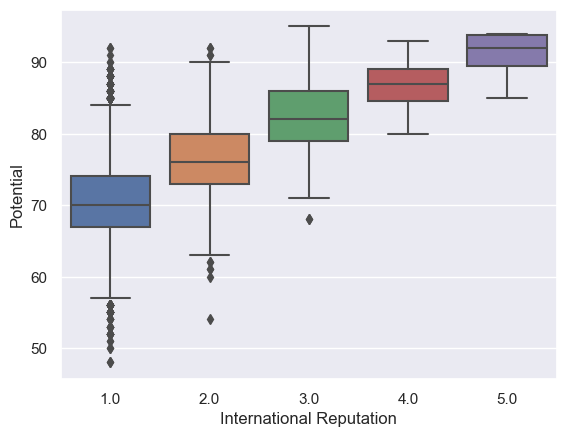

In [64]:
# lets see anouther example with catagorical variable in X_axis
sns.boxplot(x="International Reputation", y="Potential", data=df)
plt.show()


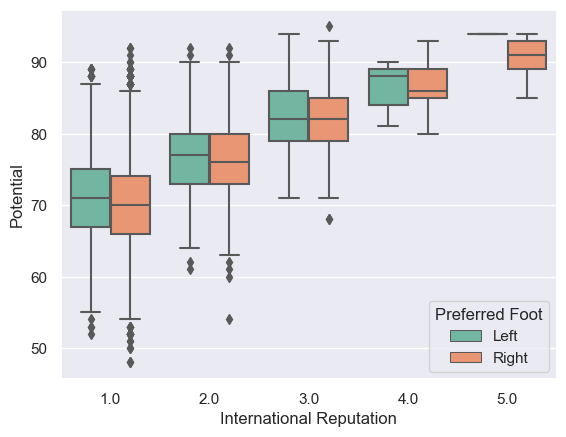

In [71]:
#by pasing 3 parameter third one as hue and is catagorical
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=df, palette="Set2")
plt.show()

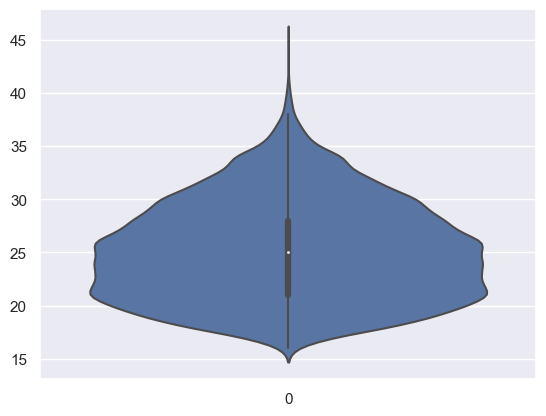

In [56]:

sns.violinplot(x)
plt.show()

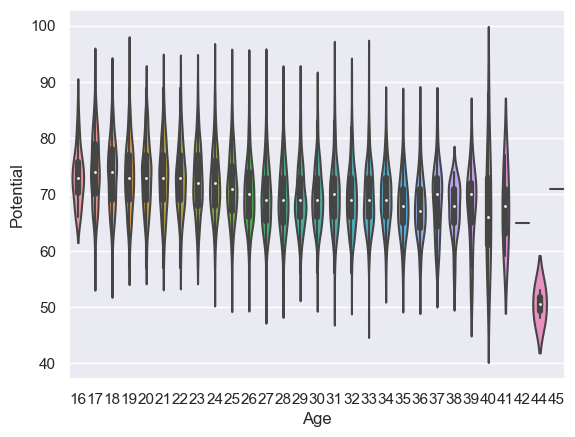

In [65]:
sns.violinplot(x="Age", y="Potential", data=df)
plt.show()

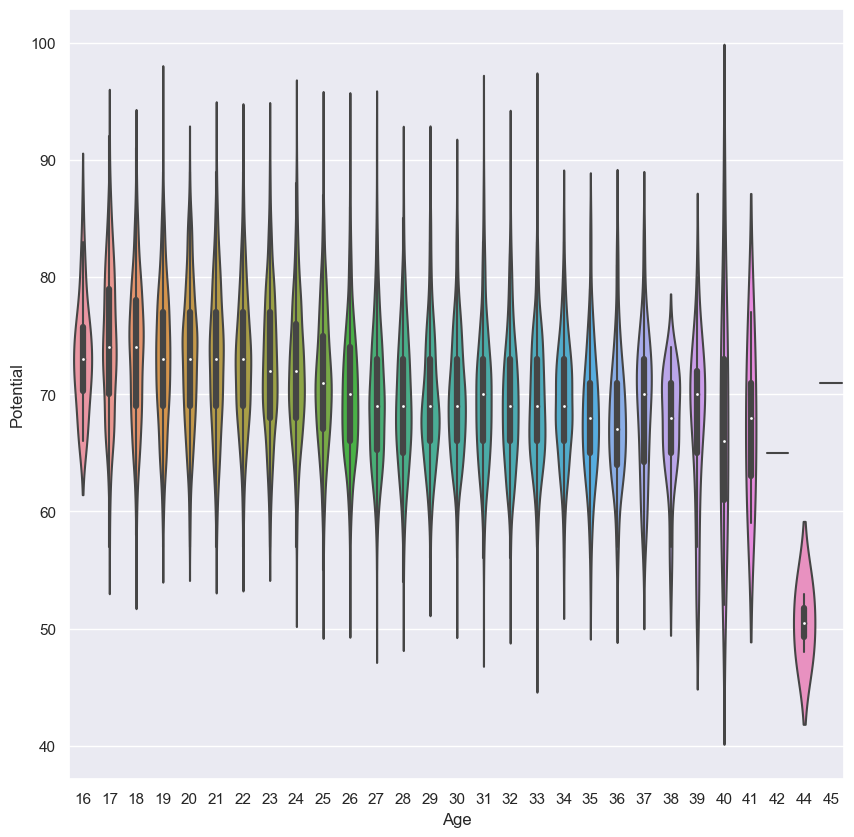

In [66]:
#if we see in big figure size we can see the two numerical comarison also 
#but its good for catagorical value in x axies
plt.subplots(figsize=(10, 10))
sns.violinplot(x="Age", y="Potential", data=df)
plt.show()

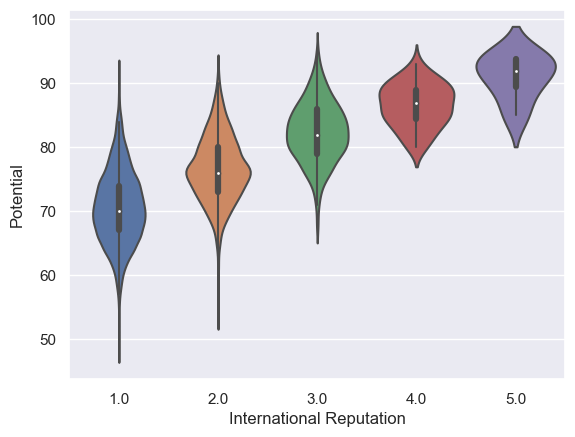

In [68]:
#to see vivariate where x-axis contain catagorical value and y-axis numeic
sns.violinplot(x="International Reputation", y="Potential", data=df)
plt.show()

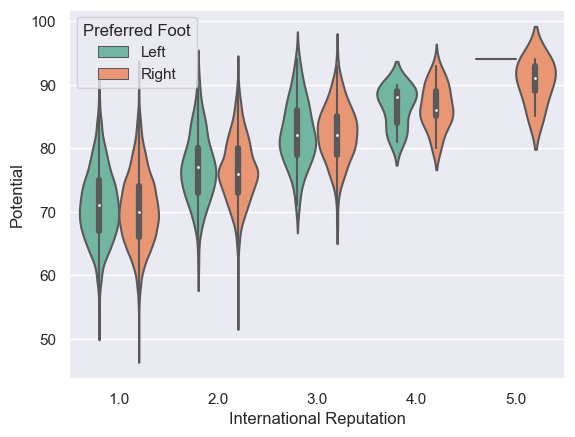

In [72]:
#By passing 3 parameter and anouther parameter as hue and its catagorical
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot",palette="Set2", data=df)
plt.show()

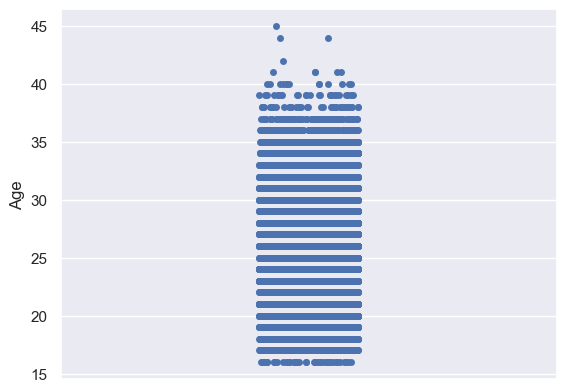

In [57]:
sns.stripplot(x)
plt.show()

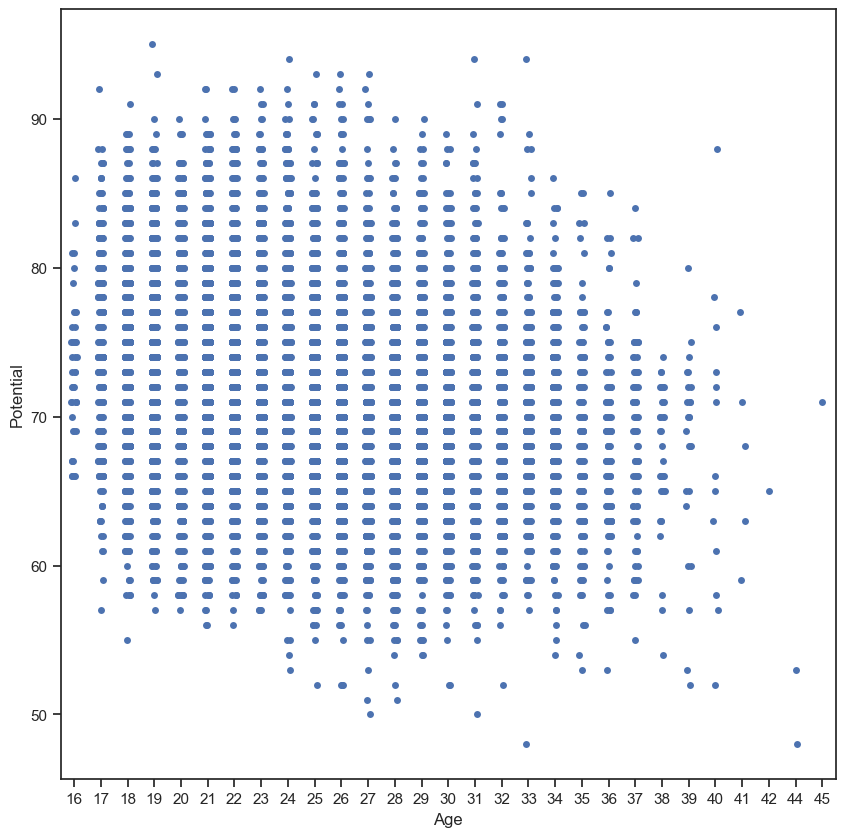

In [97]:
plt.subplots(figsize=(10, 10))
sns.stripplot(x="Age", y="Potential", data=df)
plt.show()

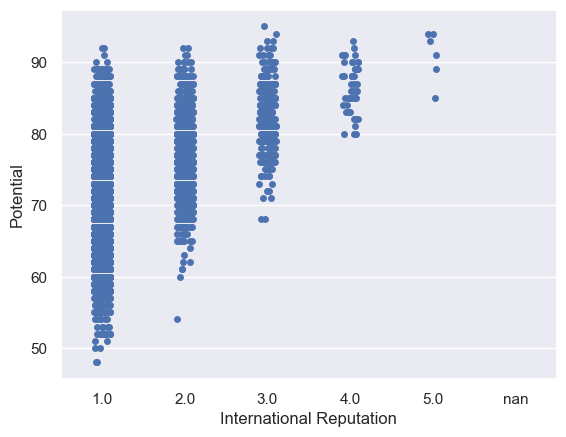

In [69]:
sns.stripplot(x="International Reputation", y="Potential", data=df)
plt.show()

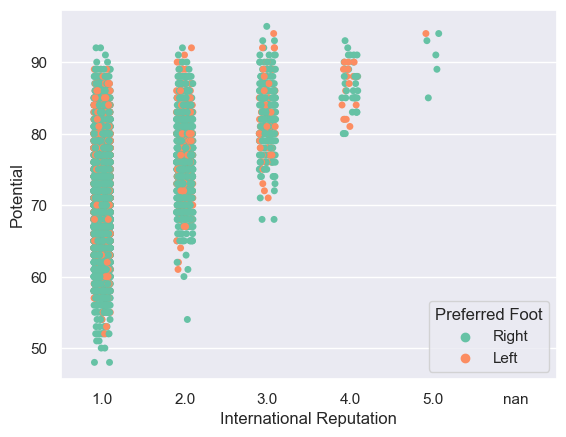

In [74]:
#By passing 3 parameter and anouther parameter as hue and its catagorical
sns.stripplot(x="International Reputation", y="Potential",hue="Preferred Foot",palette="Set2", data=df)
plt.show()


Insight:By using boxplot, stripplot and violin plot we can  see univariate distribution  as well as Bivariate
For Vivariate analysis,   the catagorical value in X-axis present better picture than numerical x_axis.
And this 3 plot is good for see the univariate(median, max, min and iqr) and Bivariate (catagory vs numerical ) is better. we can also use hue= catagorical variable as third variable[Noted: for numerical vs numerical variable, joint, scatter,lineplot,lmplot and regplot is better]

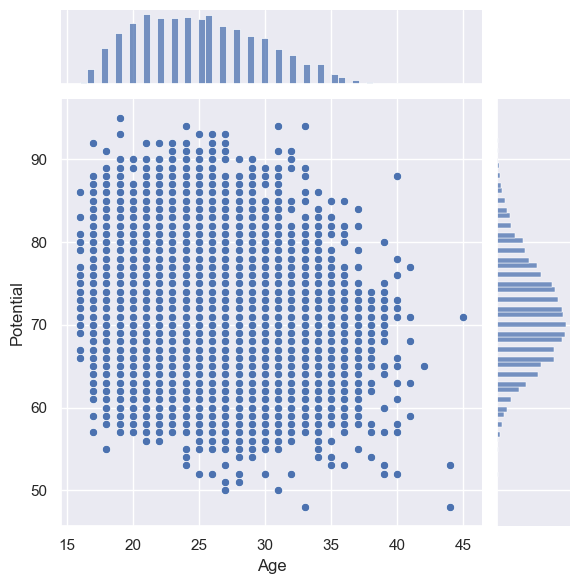

In [75]:
# lets see anouther Bivariate analysis with joint
sns.jointplot(x="Age", y="Potential", data=df)
plt.show()

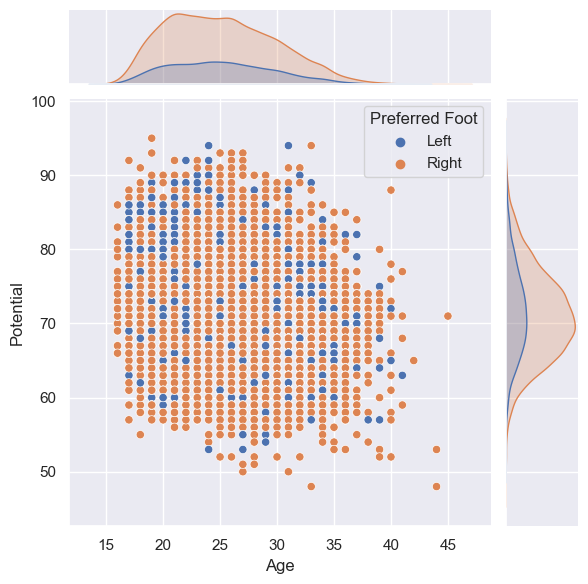

In [82]:
sns.jointplot(x="Age", y="Potential",hue="Preferred Foot", data=df)
plt.show()

Insight:in here, potential variable is nrrmal distribution where age is positive skewed, from that we prefer potential is good variable then age

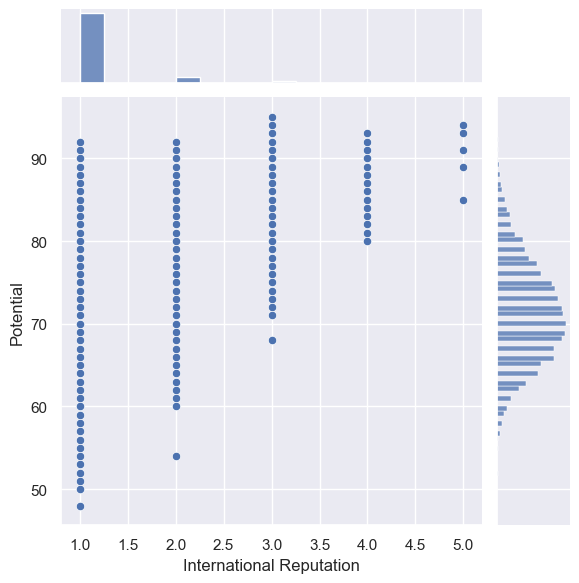

In [77]:
sns.jointplot(x="International Reputation", y="Potential", data=df)
plt.show()

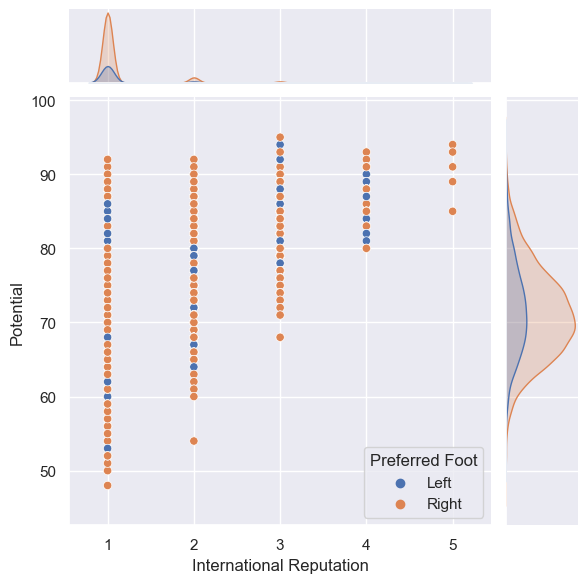

In [83]:
sns.jointplot(x="International Reputation", y="Potential",hue="Preferred Foot", data=df)
plt.show()

Insight:in here, potential variable is normal distribution where age is positive skewed, from that we prefer potential is good variable then international reputaion

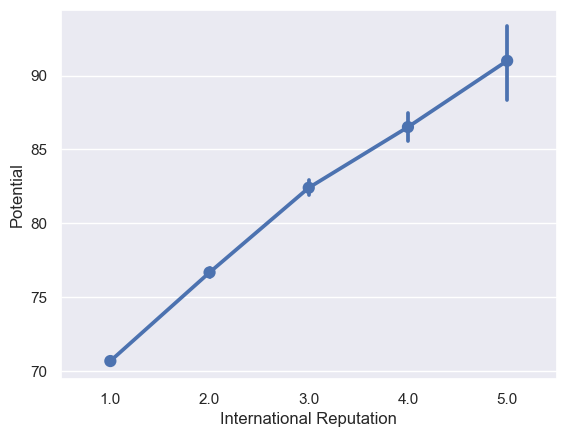

In [78]:
#pointplot,A point plot represents an estimate of central tendency for a numeric variable 
#by the position of scatter plot points 
#and provides some indication of the uncertainty around that estimate using error bars.
# can be used to compare the means or average values of a quantitative variable across different categories.

sns.pointplot(x="International Reputation", y="Potential", data=df)
plt.show()

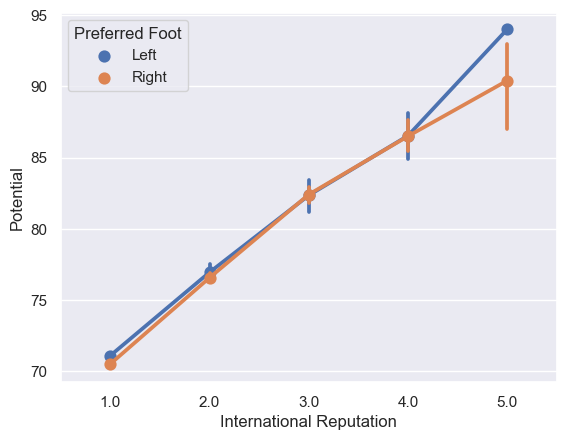

In [80]:
sns.pointplot(x="International Reputation", y="Potential",hue="Preferred Foot", data=df)
plt.show()

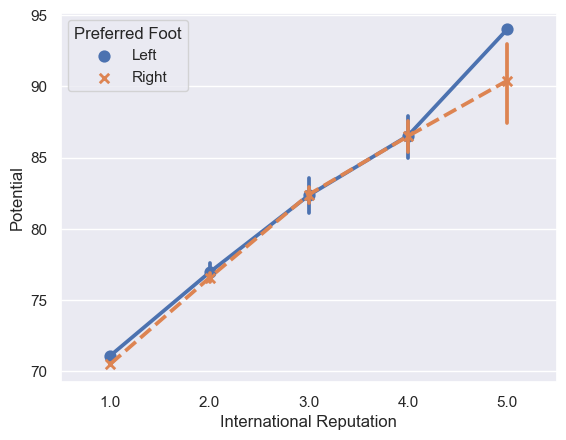

In [85]:
#With line style and marker
sns.pointplot(x="International Reputation", y="Potential",hue="Preferred Foot",markers=["o", "x"], linestyles=["-", "--"], data=df)
plt.show()

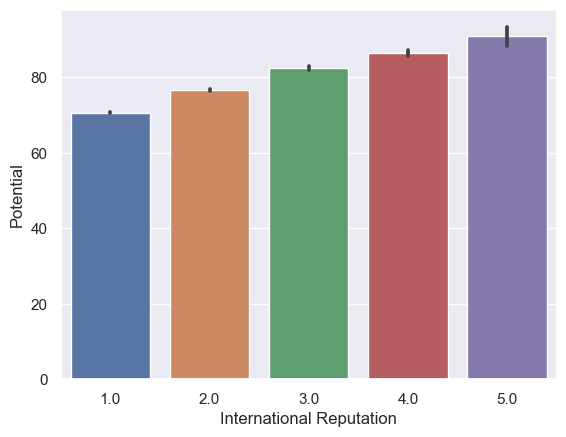

In [87]:
#Barplot
# effective for comparing and visualizing the distribution or values of a quantitative variable across different categories.
sns.barplot(x="International Reputation", y="Potential", data=df)
plt.show()


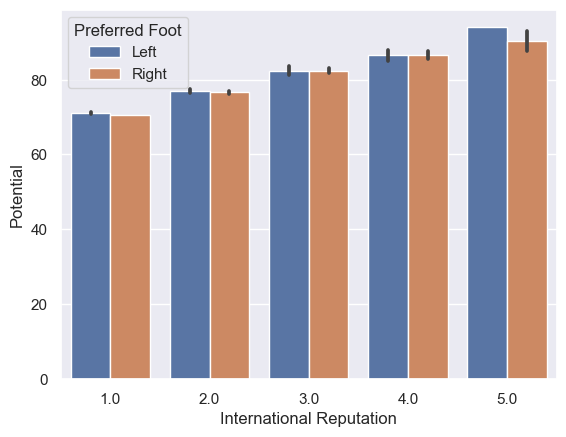

In [88]:
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=df)
plt.show()

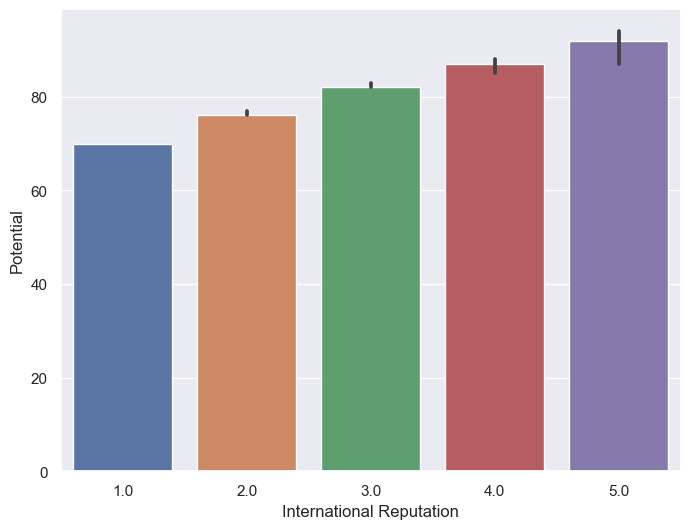

In [89]:
# median as estimator on top of bar
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=df, estimator=median)
plt.show()

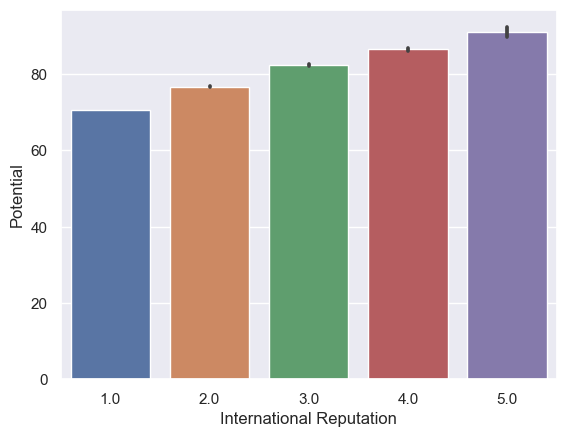

In [91]:
#show th std error of mean
sns.barplot(x="International Reputation", y="Potential", data=df, ci=68)
plt.show()

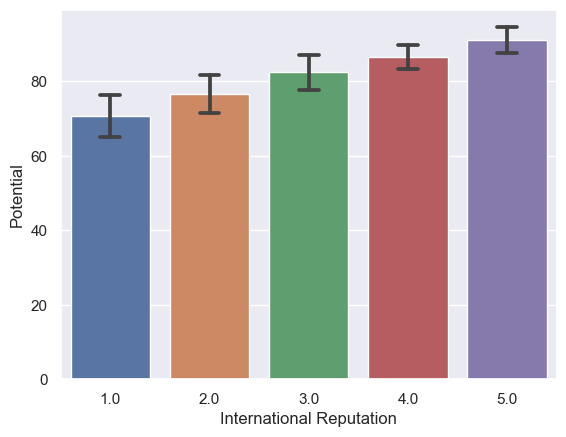

In [93]:
#We can show standard deviation of observations instead of a confidence interval 
sns.barplot(x="International Reputation", y="Potential", data=df, ci="sd",capsize=0.2)
plt.show()

# Visualizing realtionship between two continos variable 

Relplot,Reg plot, scatterplot, lmplot,lineplot, 

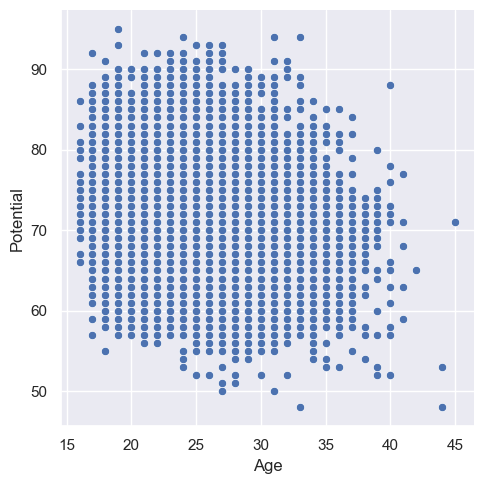

In [20]:
 #Replot:Scatter is default but we can chang with kind=line
sns.relplot(x="Age", y="Potential", data=df)

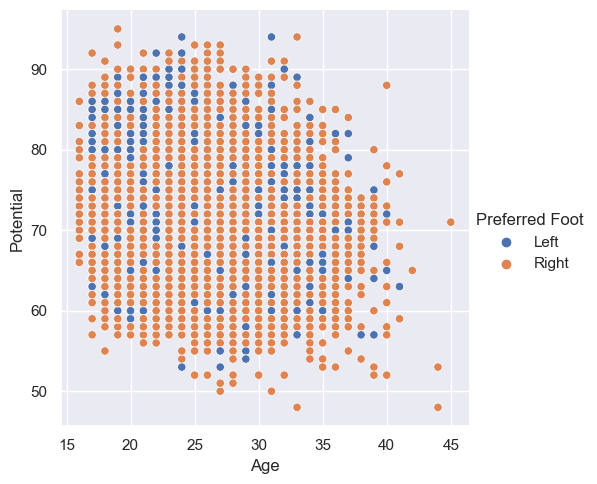

In [32]:
sns.relplot(x="Age", y="Potential",hue="Preferred Foot", data=df)

<Axes: xlabel='Age', ylabel='Potential'>

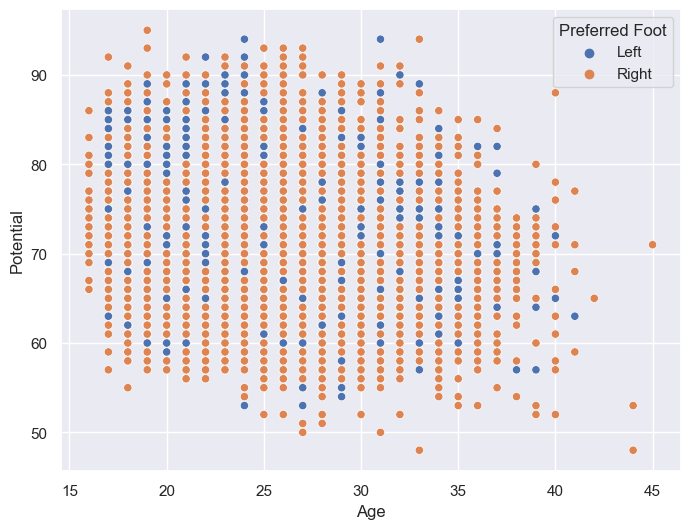

In [36]:
#scatterplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Age", y="Potential", hue="Preferred Foot", data=df, ax=ax)

<Axes: xlabel='Age', ylabel='Potential'>

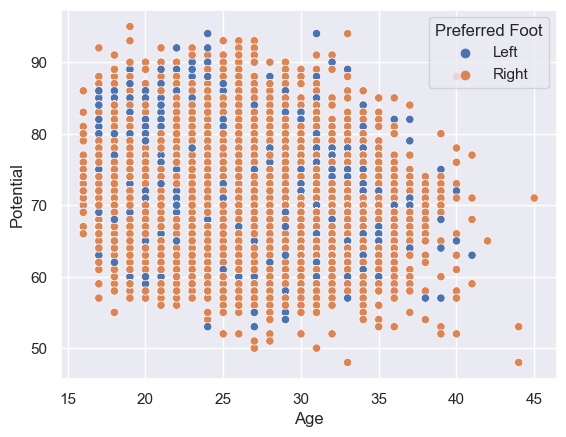

In [25]:
#Scatterplot:
sns.scatterplot(x="Age", y="Potential",hue="Preferred Foot", data=df)

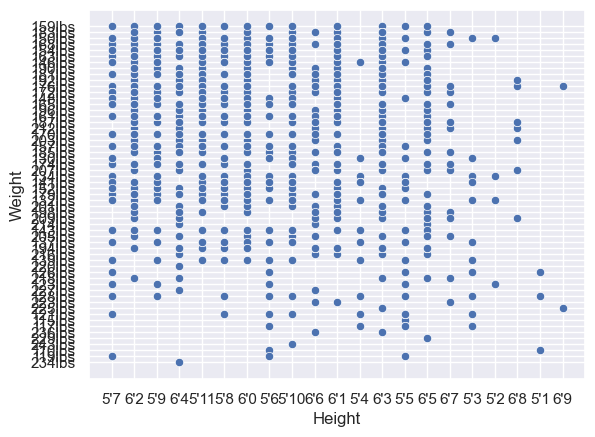

In [38]:
sns.scatterplot(x="Height", y="Weight", data=df)
plt.show()

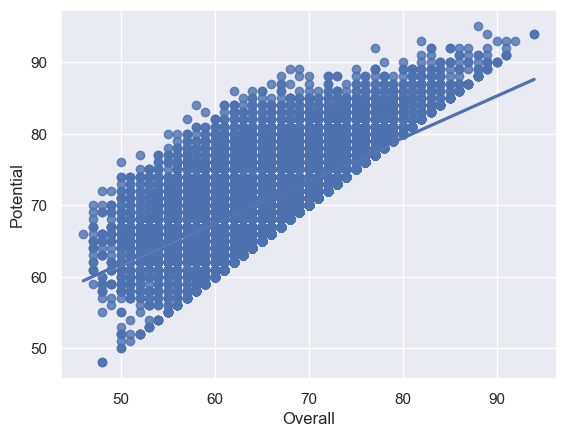

In [42]:
#Regplot, combination of scatter and and regline
sns.regplot(x="Overall", y="Potential", data=df)
plt.show()

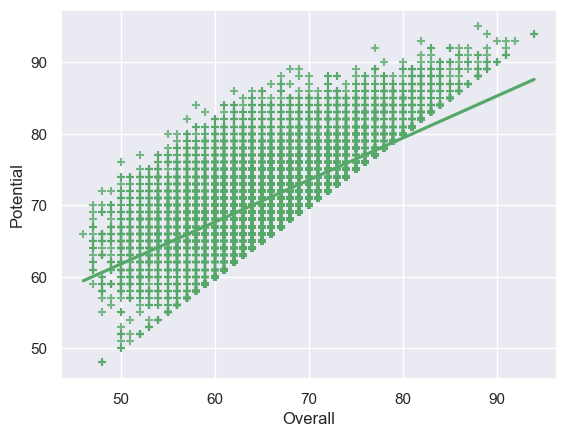

In [48]:
sns.regplot(x="Overall", y="Potential", data=df, color= "g", marker="+")
plt.show()

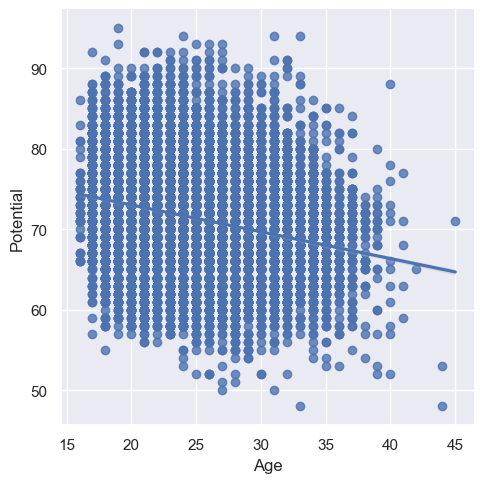

In [15]:
#lmplot,This function combines regplot() and FacetGrid.
sns.lmplot(x="Age", y="Potential", data=df)
plt.show()

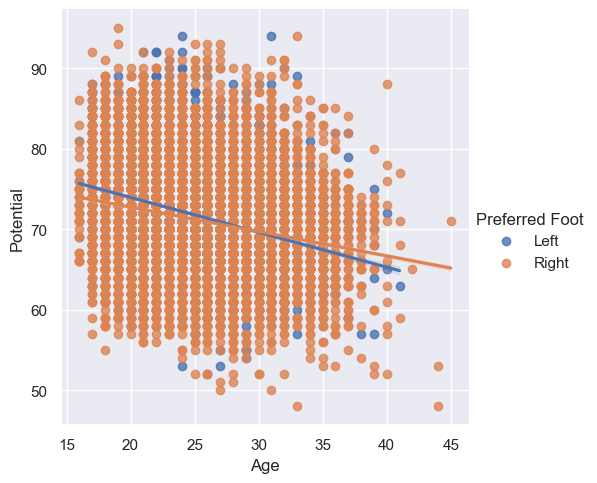

In [16]:
# we can also use hue as third parameter
sns.lmplot(x="Age", y="Potential",hue="Preferred Foot",data=df)


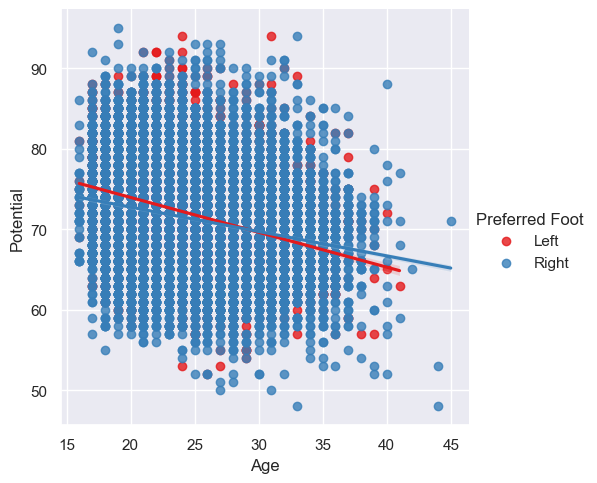

In [17]:
# we can use different color
sns.lmplot(x="Age", y="Potential",hue="Preferred Foot",data=df,palette="Set1")

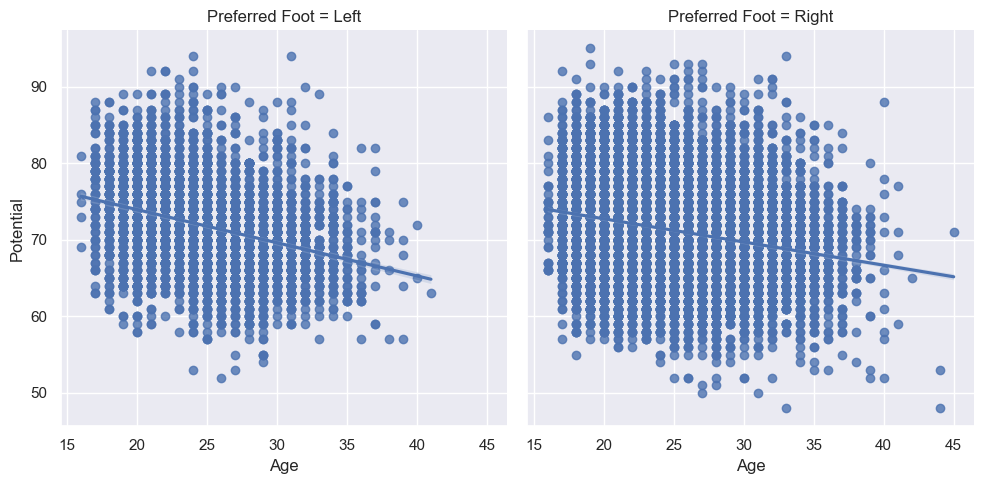

In [19]:
#we can  also devide the hue as third value which is catagorical divided by col
sns.lmplot(x="Age", y="Potential",col="Preferred Foot",data=df,palette="Set2")

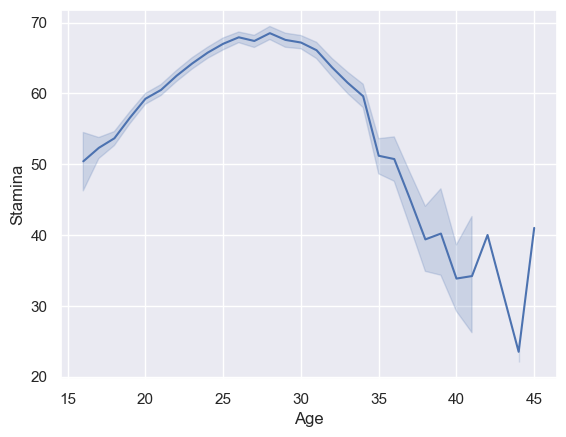

In [40]:
#Line plot,Line plots are particularly effective for displaying trends over time or any other continuous axis.
sns.lineplot(y="Stamina", x="Age", data=df)
plt.show()

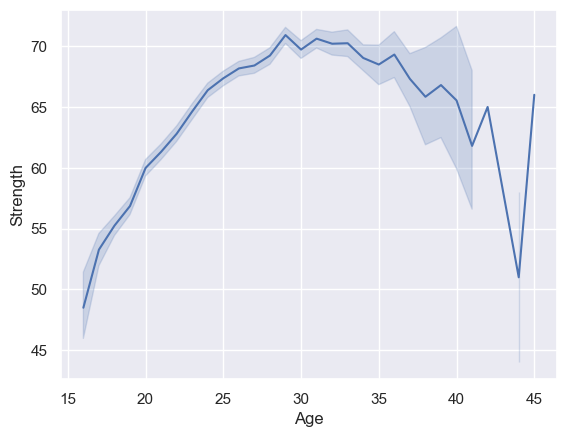

In [41]:
sns.lineplot(y="Strength", x="Age", data=df)
plt.show()

insight:strength ofplayer increase untill around 30 and after 30 the strength of player is decrease before 45

# Multiplotgrid

1)Facedgrid()
The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

A FacetGrid can be drawn with up to three dimensions - row, col and hue. The first two have obvious correspondence with the resulting array of axes - the hue variable is a third dimension along a depth axis, where different levels are plotted with different colors.
These variables should be categorical or discrete,

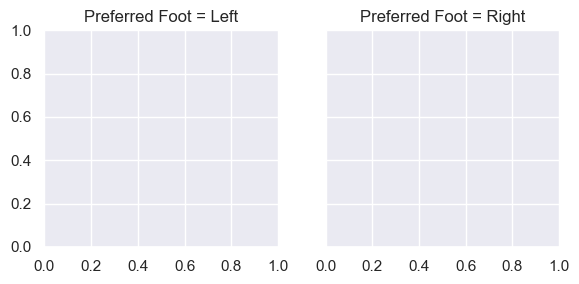

In [50]:
#First we define a facedgrid for column of df
g = sns.FacetGrid(df, col="Preferred Foot")

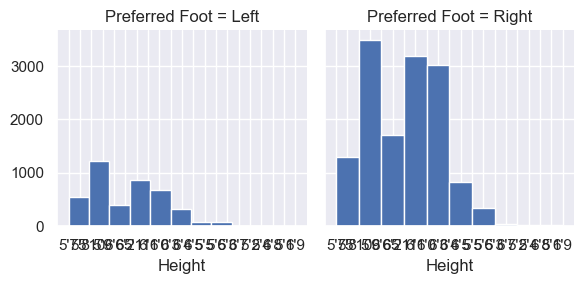

In [53]:
#Then we do univariate analysis of variable and assign the analysis into Facedgrid
g = sns.FacetGrid(df, col="Preferred Foot")
g = g.map(plt.hist, "Height")

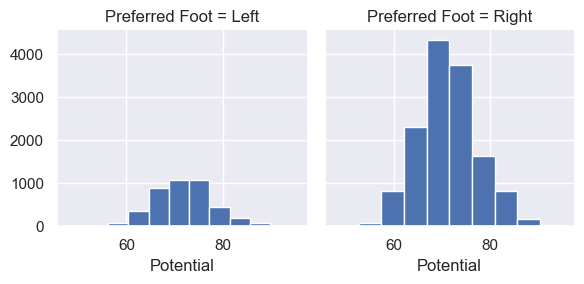

In [54]:
g = sns.FacetGrid(df, col="Preferred Foot")
g = g.map(plt.hist, "Potential")

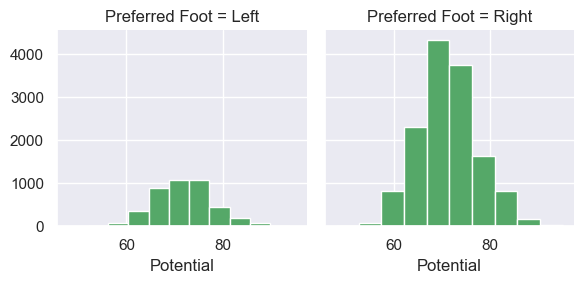

In [55]:
g = sns.FacetGrid(df, col="Preferred Foot")
g = g.map(plt.hist, "Potential",color="g")

Insight:the players with right foot preffered have hight potential

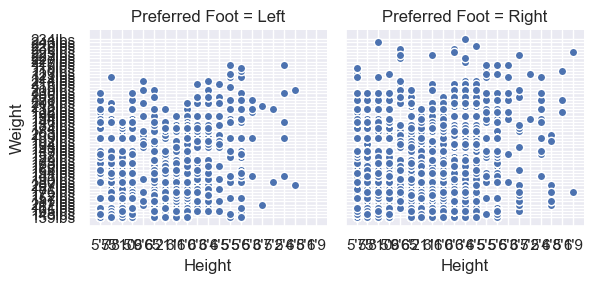

In [58]:
# Bivariate anlyiss and  assgn to facedgrid preferred foot
# also assign the legend
a=sns.FacetGrid(df, col="Preferred Foot")
a=(a.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

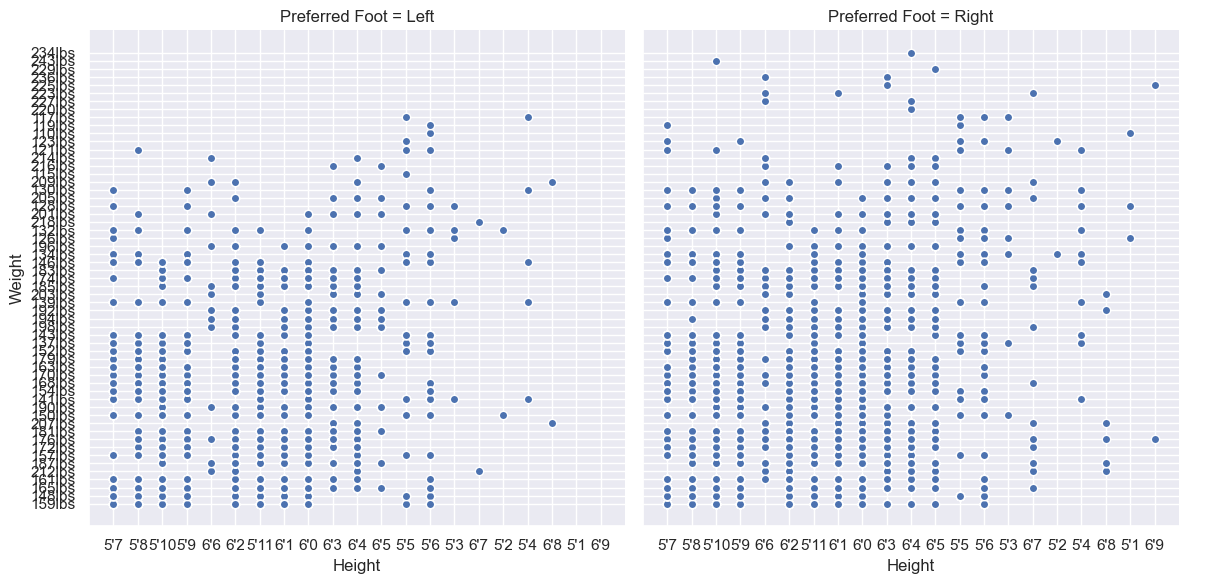

In [61]:
# if we want to change  size of facedgrid
g = sns.FacetGrid(df, col="Preferred Foot",height=6, aspect=1)
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())

# Pairgrid

This parfrid() function plots subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes.
Best for finding interrelationship between variable

In [63]:
#First define the variable set which you interest to see corelation
df_new = df[['Age', 'Potential', 'Strength', 'Stamina', 'Preferred Foot']]

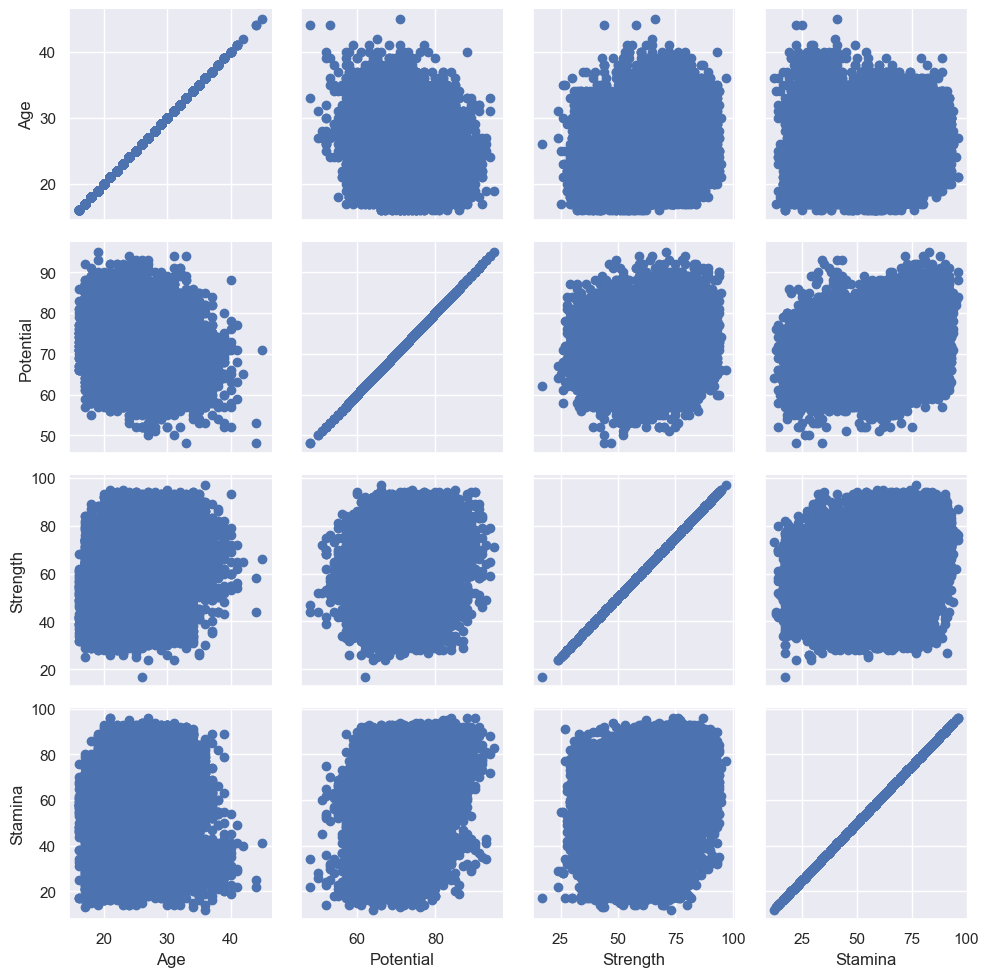

In [64]:
# Then define or create pairgrid
#Then assign the plot to pairgrid by map function
b = sns.PairGrid(df_new)
b = b.map(plt.scatter)

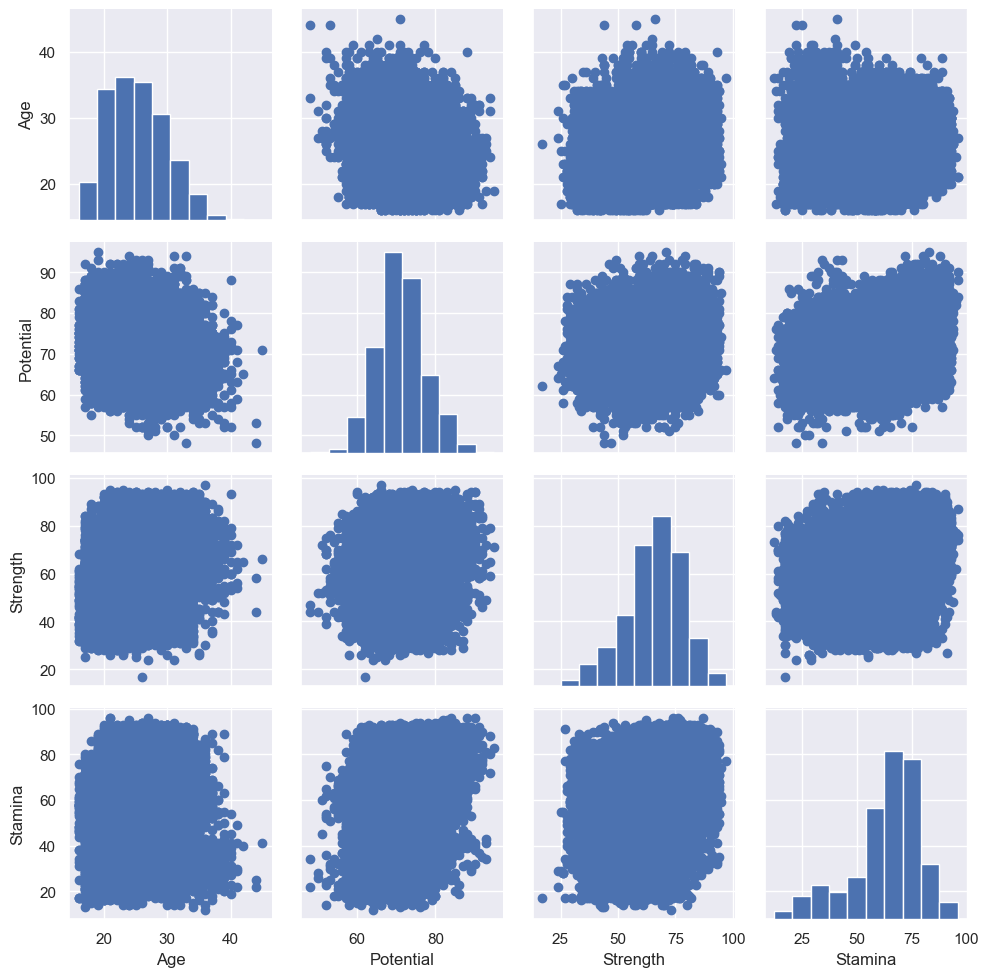

In [69]:
#If we want to change the diagonal plot in different
d = sns.PairGrid(df_new)
d = d.map_diag(plt.hist)
d = d.map_offdiag(plt.scatter)

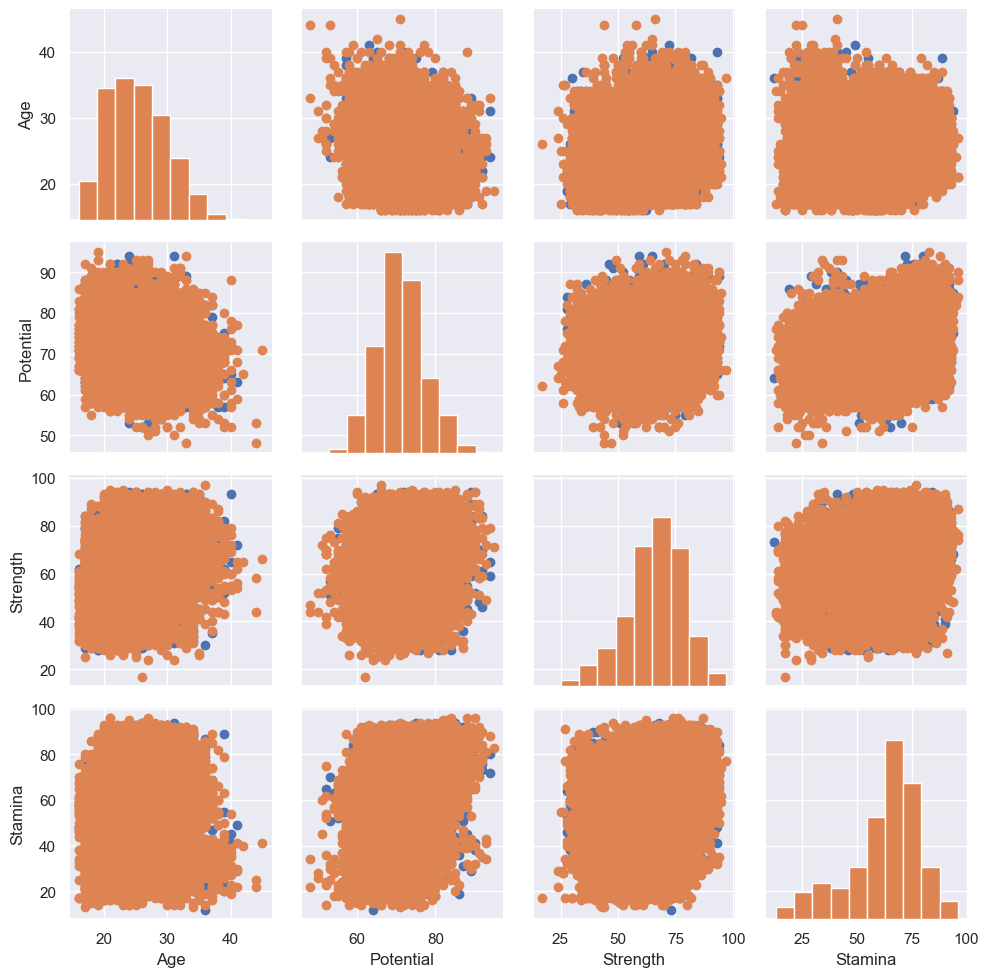

In [70]:
# specified by hue
d = sns.PairGrid(df_new, hue="Preferred Foot")
d = d.map_diag(plt.hist)
d = d.map_offdiag(plt.scatter)

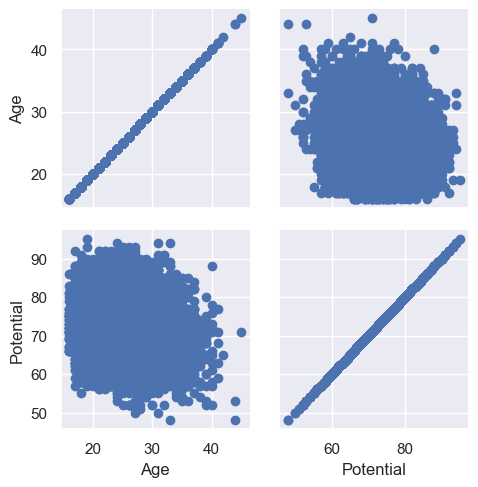

In [73]:
#plot a subset of variables from df_new 
g = sns.PairGrid(df_new, vars=['Age', 'Potential'])
g = g.map(plt.scatter)

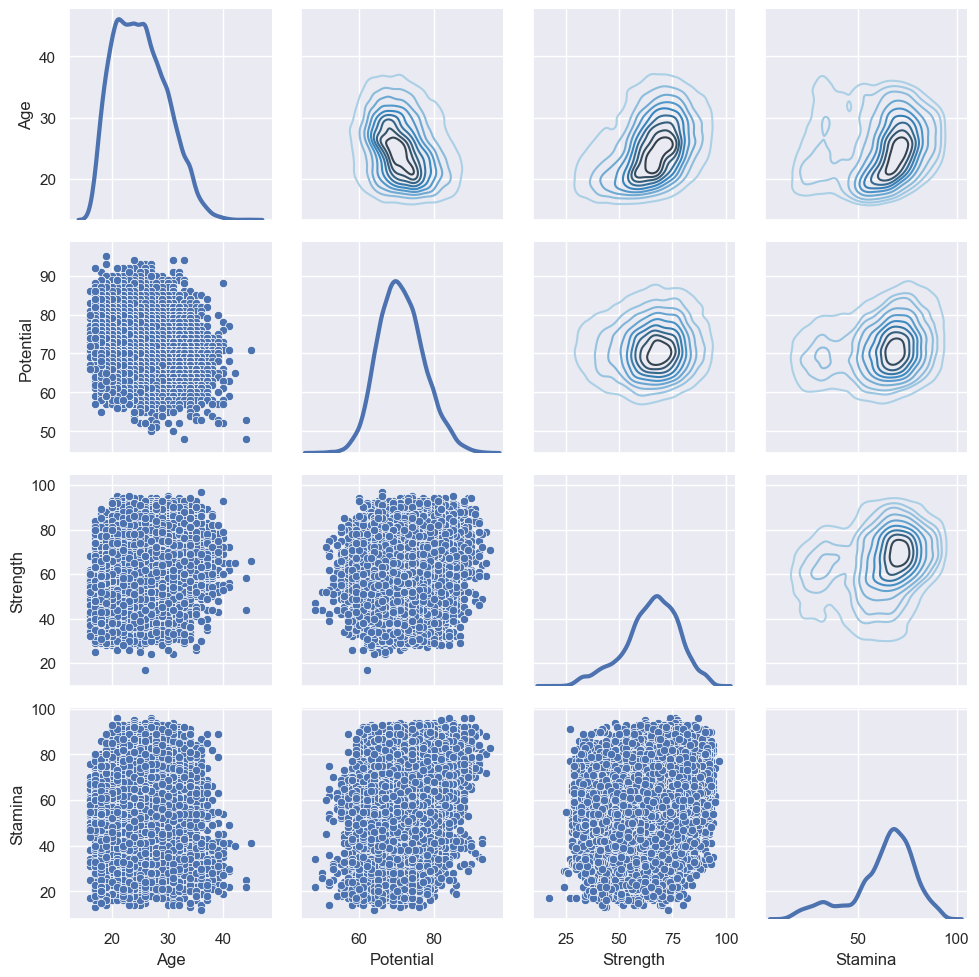

In [76]:
#use different plot function in all 3 part of pair plot
g = sns.PairGrid(df_new)
g = g.map_upper(sns.kdeplot, cmap="Blues_d")
g = g.map_lower(sns.scatterplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

# Jointgrid()

This function provides a grid for drawing a bivariate plot with marginal univariate plots.

It set up the grid of subplots.

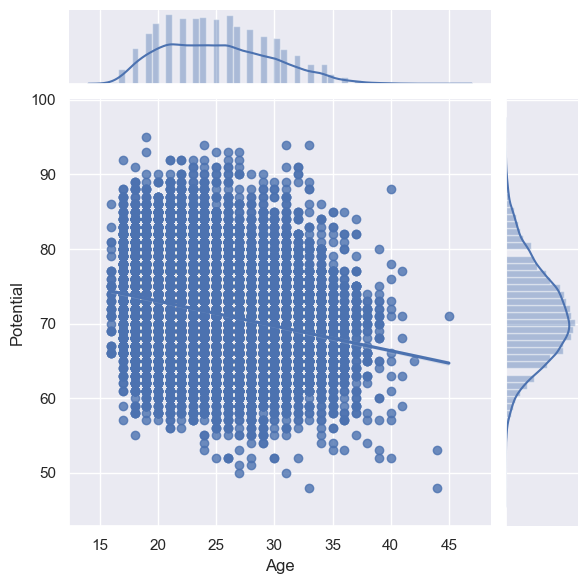

In [77]:
#First we initialized the figure with jointgrid
#Then draw the double plot 
g = sns.JointGrid(x="Age", y="Potential", data=df)
g = g.plot(sns.regplot, sns.distplot)

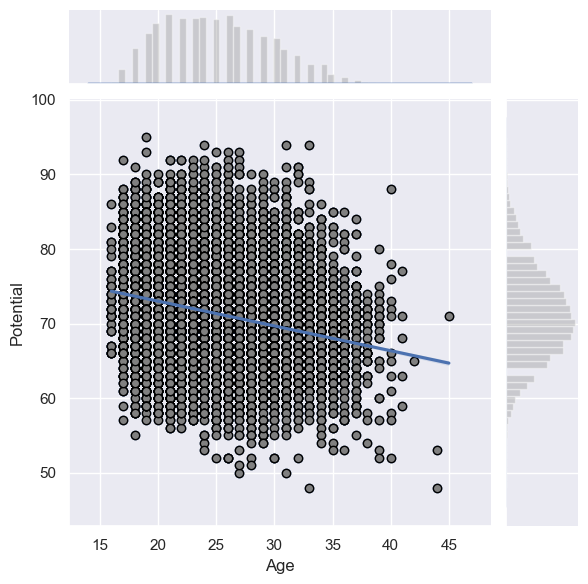

In [78]:
#We can draw the join and marginal plots separately, which allows finer-level tuning with other parameter
j = sns.JointGrid(x="Age", y="Potential", data=df)
j = g.plot_joint(plt.scatter, color=".5", edgecolor="black")
j = g.plot_marginals(sns.distplot, kde=False, color=".6")

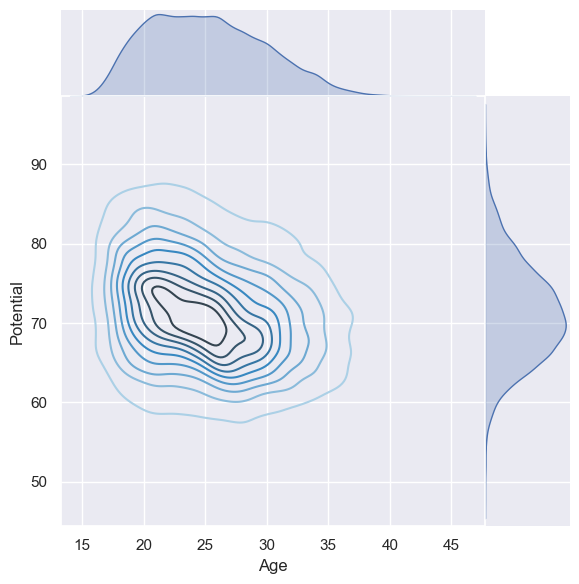

In [84]:
#we can also remove the space betwen the plot
j = sns.JointGrid(x="Age", y="Potential", data=df, space=0)
j= j.plot_joint(sns.kdeplot, cmap="Blues_d")
j= j.plot_marginals(sns.kdeplot, shade=True)

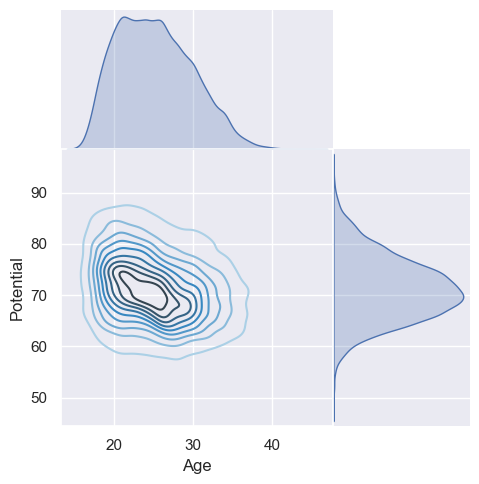

In [85]:
#changing the size figureheight=5, ratio=2
j = sns.JointGrid(x="Age", y="Potential", data=df, space=0,height=5, ratio=2)
j= j.plot_joint(sns.kdeplot, cmap="Blues_d")
j= j.plot_marginals(sns.kdeplot, shade=True)

potential variable is normal distribution and age is positively skewed, so we can prefer potential as good predictor

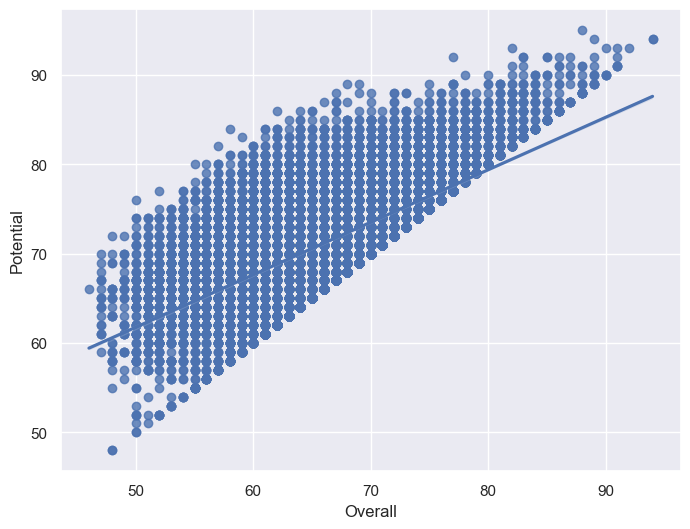

In [86]:
# changing the figure size
# for cahnging the figure size , first we need define figsize in subplot
ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=df);

insight:potential of player increase with overall variable , its positive relation

In [88]:
# To change the background grid
# darkgrid, whitegrid, dark, white and ticks.
# suited to different applications and personal preferences.
#The default theme is darkgrid.

import matplotlib.pyplot as plt

In [90]:
#To see differnt sine wave in diferent grid
#we can define sine function which help us better visualization
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

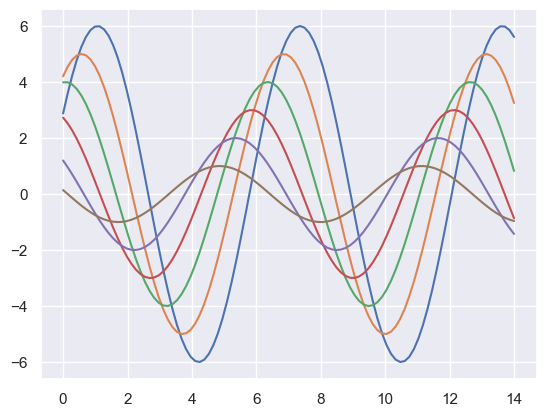

In [91]:
sinplot()#default darkgrid

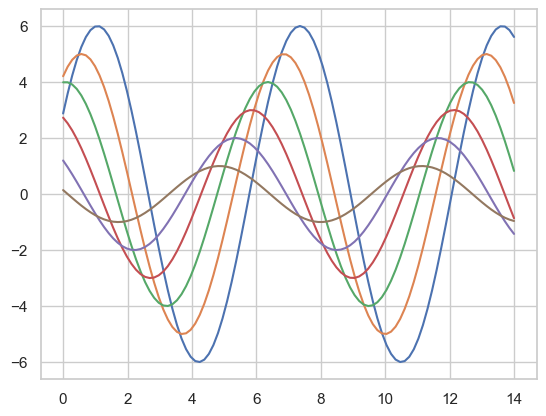

In [92]:
#if you want to change
sns.set_style("whitegrid")
sinplot()

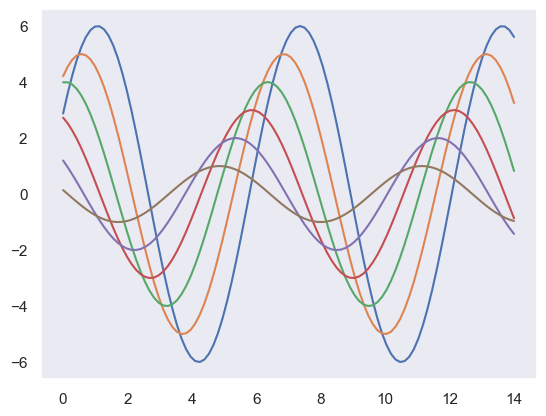

In [93]:
sns.set_style("dark")
sinplot()

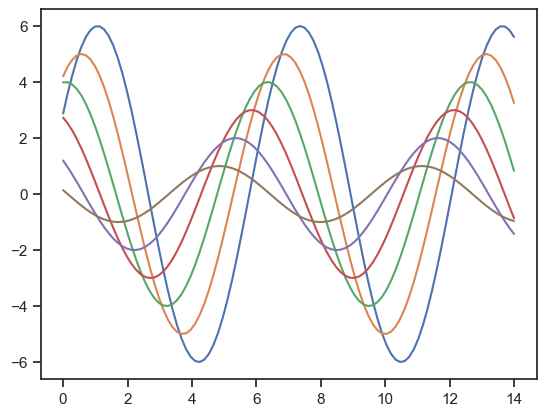

In [94]:
sns.set_style("ticks")
sinplot()